In [ ]:
import numpy as np
import pandas as pd

In [ ]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [ ]:
prices_a[:-1]

array([8.7 , 8.91])

In [ ]:
prices_a[1:]/prices_a[:-1] -1

array([ 0.02413793, -0.02244669])

In [ ]:
prices = pd.DataFrame({'Blue':[8.70, 8.91, 8.71, 8.43, 8.73],
                      'Orange': [10.66, 11.08, 10.71,11.59, 12.11]})
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [ ]:
prices.iloc[1:]

,Blue,Orange
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [ ]:
prices.iloc[:-1]

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [ ]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,Blue,Orange
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [ ]:
prices/prices.shift(1) - 1

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [ ]:
prices.pct_change()

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [ ]:
prices.plot()

<AxesSubplot:>

In [ ]:
%matplotlib inline

<AxesSubplot:>

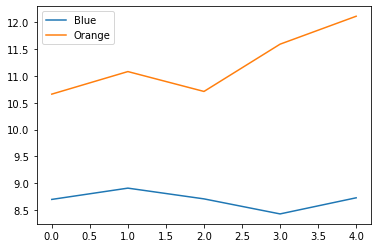

In [ ]:
prices.plot()

In [ ]:
prices_a = np.random.rand(15)
prices_a = prices_a * 1.2 + 11
prices_b = np.random.rand(15) * 1.4 + 13
prices_c = np.random.normal(2, 2, 15)
prices_c += 10
prices_d = np.random.normal(1, 1, 15)
prices_d += 10
prices = pd.DataFrame({'blue': prices_a, 'orange': prices_b, 'green': prices_c, 'red': prices_d})
prices

,blue,orange,green,red
0,12.029455,14.212009,12.038096,10.870139
1,11.346540,14.241675,11.042552,10.286888
2,11.241133,13.623945,10.964778,10.783999
3,11.019686,14.242210,11.273804,12.133285
4,11.245682,14.259974,14.313228,12.622802
5,11.563937,14.036682,9.304147,11.238700
6,11.625888,14.399820,12.277219,13.137305
7,11.581508,13.224219,16.238542,10.764119
8,12.013089,14.031733,12.705181,12.229864
9,11.562514,13.145868,8.650756,11.994768


<AxesSubplot:>

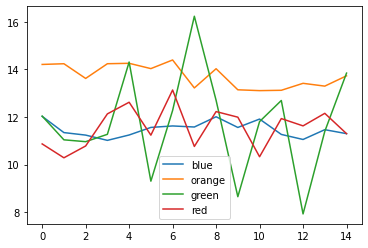

In [ ]:
prices.plot()

In [ ]:
returns = prices.pct_change()
returns.head()

,blue,orange,green,red
0,NaN,NaN,NaN,NaN
1,-0.056770,0.002087,-0.082699,-0.053656
2,-0.009290,-0.043375,-0.007043,0.048325
3,-0.019700,0.045381,0.028183,0.125119
4,0.020508,0.001247,0.269601,0.040345


<AxesSubplot:>

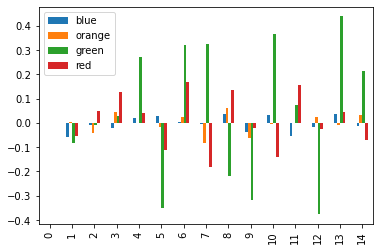

In [ ]:
returns.plot.bar()

In [ ]:
returns.std()

blue      0.032060
orange    0.040045
green     0.283261
red       0.112509
dtype: float64

In [ ]:
returns.mean()

blue     -0.003964
orange   -0.001683
green     0.048634
red       0.008692
dtype: float64

In [ ]:
((np.prod(returns + 1) - 1) * 100).round(2)

blue       8.52
orange     7.22
green     -0.13
red       14.15
dtype: float64

## Annualization

In [ ]:
monthly_return = 0.01
year_return = ((1 + monthly_return) ** 12) - 1
year_return

0.12682503013196977

In [ ]:
return_quarter = 0.04
return_year = ((1 + return_quarter) ** 4) - 1
return_year

0.1698585600000002

In [ ]:
daily_return = 0.0001
return_year1 = ((1 + daily_return) ** 252) - 1
return_year1

0.025518911987694626

## Risk
#### Adjusted Returns

In [ ]:
sample_prices = pd.read_csv(r'data/sample_prices.csv')
sample_prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [ ]:
returns = sample_prices.pct_change()
returns = returns.dropna()
returns.head(4)

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [ ]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [ ]:
deviations = returns - returns.mean()
squared_deviations = deviations ** 2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [ ]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum() / (number_of_obs - 1)
volatility = variance ** 0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [ ]:
volatility*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [ ]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', 
                      header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [ ]:
returns.head(5)

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [ ]:
cols = ['Lo 10', 'Hi 10']
returns = returns[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [ ]:
returns = returns / 100

In [ ]:
returns.head(3)

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067


<AxesSubplot:>

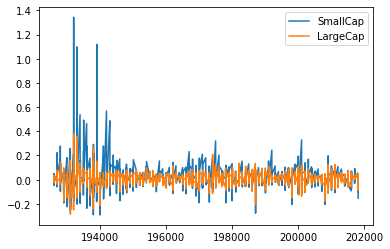

In [ ]:
returns.columns = ['SmallCap', 'LargeCap']
returns.plot()

In [ ]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [ ]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [ ]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [ ]:
annualized_return = (return_per_month+1) ** 12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [ ]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## Compute Drawdowns

<AxesSubplot:>

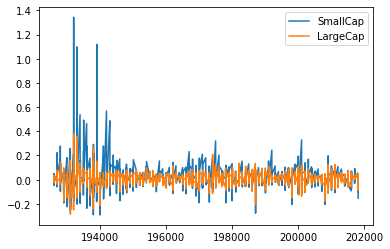

In [ ]:
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0,
                   index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [ ]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [ ]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [ ]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [ ]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [ ]:
rets['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [ ]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown, which is the wealth value as a percentage of the previous peak

In [ ]:
wealth_index = 1000*(1 + rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

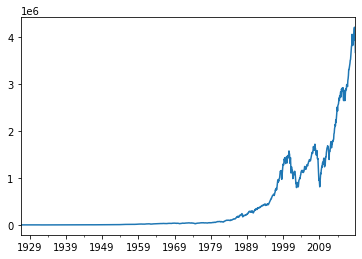

In [ ]:
wealth_index.plot()

In [ ]:
previous_peaks = wealth_index.cummax()
previous_peaks.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

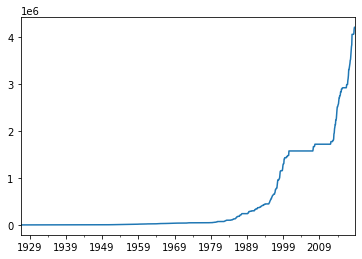

In [ ]:
previous_peaks.plot()

<AxesSubplot:>

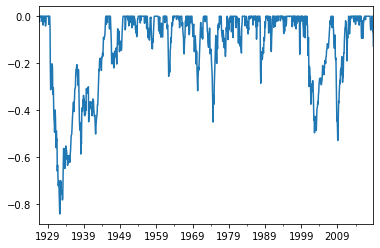

In [ ]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [ ]:
drawdown.min()

-0.8400375277943123

In [ ]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [ ]:
drawdown.idxmin()

Period('1932-05', 'M')

In [ ]:
def drawdown(returns_series: pd.Series):
    '''
    Takes a time series of asset returns
    Computes and returns a DataFrame, that contains:
            the wealth index
            the previous peaks
            percent drawdowns
    '''
    wealth_index = (1 + returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

In [ ]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1.032900,1.032900,0.0000
1926-08,1.071117,1.071117,0.0000
1926-09,1.078294,1.078294,0.0000
1926-10,1.052091,1.078294,-0.0243
1926-11,1.080498,1.080498,0.0000


<AxesSubplot:>

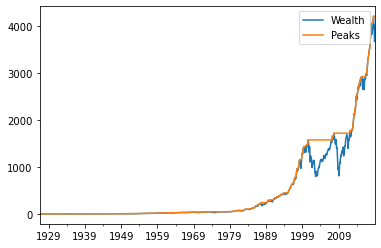

In [ ]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

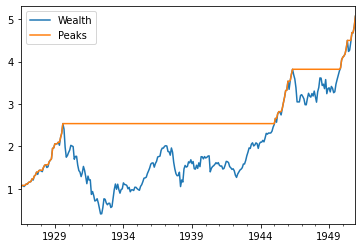

In [ ]:
drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot()

In [ ]:
drawdown(rets['LargeCap'])['Drawdown'].min()

-0.8400375277943123

In [ ]:
drawdown(rets['SmallCap'])['Drawdown'].min()

-0.8330007793945304

In [ ]:
drawdown(rets['LargeCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [ ]:
drawdown(rets['SmallCap'])['1940':]['Drawdown'].min()

-0.7000596091967913

In [ ]:
drawdown(rets['SmallCap'])['1940':]['Drawdown'].idxmin()

Period('1974-12', 'M')

In [ ]:
drawdown(rets['SmallCap'])['1975':]['Drawdown'].min()

-0.631206807725239

In [ ]:
drawdown(rets['SmallCap'])['1975':]['Drawdown'].idxmin()

Period('2009-02', 'M')

In [ ]:
drawdown(rets['LargeCap'])['1975':]['Drawdown'].min()

-0.5280945042309304

## Bitcoin Price Api
### Bitcoin prices in Dollar and Euro

In [ ]:
ticker_url = 'https://blockchain.info/ticker'

In [ ]:
import requests

In [ ]:
ticker_api = requests.get(ticker_url)

In [ ]:
ticker_api

<Response [200]>

In [ ]:
ticker_json = ticker_api.json()

S D
U R


In [ ]:
ticker_json['USD']['buy']

58402.03

In [ ]:
pd.DataFrame({'Bitcoin_USD': [ticker_json['USD']['buy'],ticker_json['USD']['sell']], 
              'Bitcoin_EUR': [ticker_json['EUR']['buy'], ticker_json['EUR']['sell']] })

,Bitcoin_USD,Bitcoin_EUR
0,58402.03,49812.89
1,58402.03,49812.89


In [ ]:
import time

In [ ]:
def creating_bitcoin_table():
    ticker_url = 'https://blockchain.info/ticker'
    usd_buy = []
    usd_sell = []
    eur_buy = []
    eur_sell = []
    for _ in range(20):
        ticker = requests.get(ticker_url)
        ticker_json = ticker.json()
        usd_buy.append(ticker_json['USD']['buy'])
        usd_sell.append(ticker_json['USD']['sell'])
        eur_buy.append(ticker_json['EUR']['buy'])
        eur_sell.append(ticker_json['EUR']['buy'])
        time.sleep(50)
    return pd.DataFrame({'USD_buy': usd_buy,
                        'USD_sell': usd_sell,
                        'EURO_buy': eur_buy,
                        'EURO_sell': eur_sell})

In [ ]:
bitcoin_prices = creating_bitcoin_table()
bitcoin_prices

,USD_buy,USD_sell,EURO_buy,EURO_sell
0,58106.00,58106.00,49551.20,49551.20
1,58106.00,58106.00,49551.20,49551.20
2,58114.73,58114.73,49557.86,49557.86
3,58103.75,58103.75,49547.47,49547.47
4,58118.02,58118.02,49557.77,49557.77
5,58185.03,58185.03,49606.09,49606.09
6,58152.02,58152.02,49568.26,49568.26
7,58152.02,58152.02,49568.26,49568.26
8,58175.70,58175.70,49590.07,49590.07
9,58165.12,58165.12,49595.04,49595.04


<AxesSubplot:>

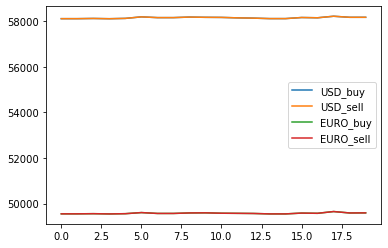

In [ ]:
bitcoin_prices.plot()

In [ ]:
bitcoin_prices.pct_change().head(10)

,USD_buy,USD_sell,EURO_buy,EURO_sell
0,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000
2,0.000150,0.000150,0.000134,0.000134
3,-0.000189,-0.000189,-0.000210,-0.000210
4,0.000246,0.000246,0.000208,0.000208
5,0.001153,0.001153,0.000975,0.000975
6,-0.000567,-0.000567,-0.000763,-0.000763
7,0.000000,0.000000,0.000000,0.000000
8,0.000407,0.000407,0.000440,0.000440
9,-0.000182,-0.000182,0.000100,0.000100


In [ ]:
bitcoin_prices.mean()

USD_buy      58143.7030
USD_sell     58143.7030
EURO_buy     49574.9775
EURO_sell    49574.9775
dtype: float64